In [2]:
import json

def filter_entries_from_json(path, kw="validation"):
    """
    Load json file of `stats`.
    """
    print(f"Reading json file {path}")
    validation = []
    with open(path, "r") as f:
        for i, line in enumerate(f):
            line = line.strip().replace("'", '"')
            line = line.replace("nan", '"nan"')
            line = line.replace("inf", '"inf"')
            line = line.replace("'", '"')
            try:
                data = json.loads(line)
            except:
                print(path)
                print(i)
                print(line)
                raise
            if data["_meta"]["type"] == kw:
                validation.append(data)
    return validation


In [32]:
import json
STATS_PATH = "./outputs/launcher/relabel/"
path_mapping = {
    "Ditto": STATS_PATH + "ditto-0.1_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "FC": STATS_PATH + "fc-grad-10-quantile0.2-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "Global": STATS_PATH + "global_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "Local": STATS_PATH + "local_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "IFCA": STATS_PATH + "ifca-grad_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "GT": STATS_PATH + "groundtruth_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats"
}

In [43]:
# Quantile
import json
STATS_PATH = "./outputs/launcher/relabel/"
quantile_mapping = {
    "0.25": STATS_PATH + "fc-grad-3-quantile0.2-1-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "0.2": STATS_PATH + "fc-grad-10-quantile0.2-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "0.1": STATS_PATH + "fc-grad-10-quantile0.1-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "0.05": STATS_PATH + "fc-grad-10-quantile0.05-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "0.025": STATS_PATH + "fc-grad-10-quantile0.025-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
}

# local steps
import json
STATS_PATH = "./outputs/launcher/relabel/"
local_steps_mapping = {
    "5": STATS_PATH + "fc-grad-10-quantile0.2-2-5_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "10": STATS_PATH + "fc-grad-10-quantile0.2-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "20": STATS_PATH + "fc-grad-10-quantile0.2-2-20_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
    "40": STATS_PATH + "fc-grad-10-quantile0.2-2-40_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats",
}



In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.style.use('tableau-colorblind10')

# fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True, sharex=True)
fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)
for ax, mapping in zip(axes, [path_mapping, quantile_mapping, local_steps_mapping]):
    for k, v in mapping.items():
        data = filter_entries_from_json(v, "Global Validation")
        x = [d["E"] for d in data]
        y = [d["top1"] for d in data]
        if k == "GT":
            x = x[:60]
            y = y[:60]
        ax.plot(x, y, label=k)

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Accuracy")
    ax.set_xlim(0, )

    ax.set_ylim(0, 55)

for ax, caption in zip(axes, ["Algo.", r"$\tau$ (Percentile)", "Local Steps"]):
    ax.legend(title=caption)

fig.savefig("./outputs/cifar10.pdf", bbox_inches="tight")

Reading json file ./outputs/launcher/relabel/fc-grad-10-quantile0.2-2-5_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats
Reading json file ./outputs/launcher/relabel/fc-grad-10-quantile0.2-2-10_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats
Reading json file ./outputs/launcher/relabel/fc-grad-10-quantile0.2-2-20_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats
Reading json file ./outputs/launcher/relabel/fc-grad-10-quantile0.2-2-40_data=relabel_n=20_K=4_Kgen=4_lr=1.000e-01_m=0.90_v=32_noniid=0.0_ms=200_ss=1/stats


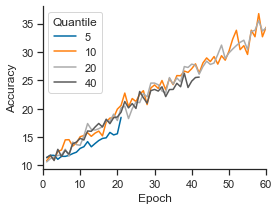

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.style.use('tableau-colorblind10')


fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for k, v in local_steps_mapping.items():
    data = filter_entries_from_json(v, "Global Validation")
    x = [d["E"] for d in data]
    y = [d["top1"] for d in data]
    ax.plot(x, y, label=k)

ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
ax.set_xlim(0, 60)
ax.legend(title="Quantile")